# Treinamento de modelo próprio para reconhecimento de texto manuscrito



In [1]:
try:
    import google.colab
    IN_COLAB = True
    print("Executando no Google Colab")
except ImportError:
    IN_COLAB = False
    print("Não executando no Google Colab")

Não executando no Google Colab


In [2]:
if IN_COLAB:
    # Baixar imagens para o laboratório.
    !wget https://github.com/fabiobento/ocr-sis-emb-2024-2/raw/refs/heads/main/imagens.zip
    !unzip -n -q imagens.zip

# Importando as bibliotecas

In [3]:
import tensorflow
tensorflow.__version__

2024-09-26 13:42:36.588842: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-26 13:42:36.597929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-26 13:42:36.609267: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-26 13:42:36.612394: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-26 13:42:36.621137: I tensorflow/core/platform/cpu_feature_guar

'2.17.0'

In [4]:
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Carregando as bases de dados

## Conjunto MNIST 0-9

In [5]:
from tensorflow.keras.datasets import mnist

In [6]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
28 * 28

784

In [9]:
train_labels.shape, test_labels.shape

((60000,), (10000,))

In [10]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
train_data[0].shape

(28, 28)

In [12]:
train_labels[0]

5

In [13]:
digitos_data = np.vstack([train_data, test_data])
digitos_labels = np.hstack([train_labels, test_labels])

In [14]:
digitos_data.shape

(70000, 28, 28)

In [15]:
digitos_labels.shape

(70000,)

In [16]:
digitos_labels

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [17]:
np.random.randint(0, digitos_data.shape[0])

5927

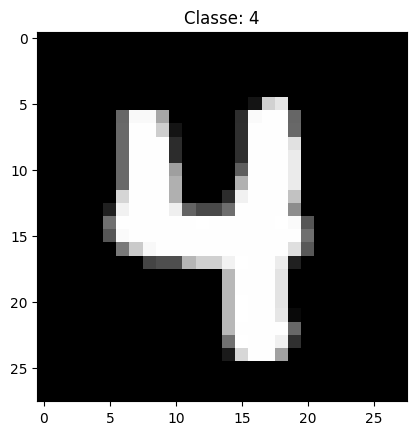

In [18]:
indice = np.random.randint(0, digitos_data.shape[0])
plt.imshow(digitos_data[indice], cmap='gray')
plt.title('Classe: ' + str(digitos_labels[indice]));

In [19]:
#sns.countplot(digitos_labels);

## Conjunto Kaggle A-Z

In [23]:
if IN_COLAB:
  # Baixar imagens do conjunto de dados
  !pip install gdown
  !gdown --id 1udg4POqbFlozb9OemBNYKw4prQ4Dmh9s -O alfabeto_A-Z.zip
  !unzip -n -q alfabeto_A-Z.zip

In [21]:
!pwd

/


In [24]:
dataset_az = pd.read_csv('./Datasets/A_Z Handwritten Data.csv').astype('float32')

FileNotFoundError: [Errno 2] No such file or directory: './Datasets/A_Z Handwritten Data.csv'

In [ ]:
#dataset_az

In [ ]:
alfabeto_data = dataset_az.drop('0', axis = 1)
alfabeto_labels = dataset_az['0']

In [ ]:
alfabeto_data.shape, alfabeto_labels.shape

In [ ]:
#alfabeto_labels

In [ ]:
alfabeto_data = np.reshape(alfabeto_data.values, (alfabeto_data.shape[0], 28, 28))

In [ ]:
alfabeto_data.shape

In [ ]:
indice = np.random.randint(0, alfabeto_data.shape[0])
plt.imshow(alfabeto_data[indice], cmap = 'gray')
plt.title('Classe ' + str(alfabeto_labels[indice]))

In [ ]:
#sns.countplot(alfabeto_labels)

## Junção das bases de dados

In [ ]:
digitos_labels, np.unique(digitos_labels)

In [ ]:
alfabeto_labels, np.unique(alfabeto_labels)

In [ ]:
alfabeto_labels += 10

In [ ]:
alfabeto_labels, np.unique(alfabeto_labels)

In [ ]:
data = np.vstack([alfabeto_data, digitos_data])
labels = np.hstack([alfabeto_labels, digitos_labels])

In [ ]:
data.shape, labels.shape

In [ ]:
data = np.array(data, dtype='float32')

In [ ]:
data.shape

In [ ]:
data = np.expand_dims(data, axis = -1)

In [ ]:
data.shape

# Pré-processamento dos dados

In [ ]:
data[0].min(), data[0].max()

In [ ]:
data /= 255.0

In [ ]:
data[0].min(), data[0].max()

In [ ]:
np.unique(labels)

In [ ]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [ ]:
np.unique(labels)

In [ ]:
labels

In [ ]:
labels[0]

In [ ]:
labels[30000], len(labels[30000]), 26 + 10

In [ ]:
# OneHotEncoder
# A, B, C, Z
# 0, 1, 2, 25

# A, B, C
# 1, 0, 0
# 0, 1, 0
# 0, 0, 1

In [ ]:
classes_total = labels.sum(axis=0)
classes_total

In [ ]:
classes_total.max()

In [ ]:
plt.imshow(data[30000].reshape(28,28), cmap='gray')
plt.title(str(labels[30000]));

In [ ]:
classes_peso = {}
for i in range(0, len(classes_total)):
  #print(i)
  classes_peso[i] = classes_total.max() / classes_total[i]

In [ ]:
classes_peso

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state = 1)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
augmentation = ImageDataGenerator(rotation_range=10, zoom_range=0.05, width_shift_range=0.1,
                                  height_shift_range=0.1, horizontal_flip = False)

# Criação da estrutura da rede neural

- Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
rede_neural = Sequential()

rede_neural.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='valid'))
rede_neural.add(MaxPool2D(pool_size=(2,2)))

rede_neural.add(Flatten())

rede_neural.add(Dense(64, activation='relu'))
rede_neural.add(Dense(128, activation='relu'))

rede_neural.add(Dense(36, activation='softmax'))

rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
2 * 2 * 128

In [ ]:
rede_neural.summary()

In [ ]:
nomes_labels = '0123456789'
nomes_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
nomes_labels = [l for l in nomes_labels]

In [ ]:
print(nomes_labels)

# Treinamento da rede neural

In [ ]:
arquivo_modelo = 'manuscrito.model'
epochs = 20
batch_size = 128

In [ ]:
checkpointer = ModelCheckpoint(arquivo_modelo + '.keras', monitor='val_loss', verbose=1, save_best_only=True) 

In [ ]:
len(X_train) // batch_size

In [ ]:
history = rede_neural.fit(augmentation.flow(X_train, y_train, batch_size=batch_size),
                                            validation_data = (X_test, y_test),
                                            steps_per_epoch = len(X_train) // batch_size,
                                            epochs = epochs,
                                            class_weight = classes_peso,
                                            verbose=1, callbacks=[checkpointer])

# Avaliação da rede neural

In [ ]:
X_test.shape

In [ ]:
previsoes = rede_neural.predict(X_test, batch_size=batch_size)

In [ ]:
previsoes

In [ ]:
previsoes[0]

In [ ]:
len(previsoes[0])

In [ ]:
np.argmax(previsoes[0])

In [ ]:
nomes_labels[24]

In [ ]:
y_test[0]

In [ ]:
np.argmax(y_test[0])

In [ ]:
nomes_labels[np.argmax(y_test[0])]

In [ ]:
rede_neural.evaluate(X_test, y_test)

In [ ]:
print(classification_report(y_test.argmax(axis=1), previsoes.argmax(axis=1), target_names=nomes_labels))

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['val_loss']);

In [ ]:
plt.plot(history.history['val_accuracy']);

# Salvando o modelo no Google Drive

In [ ]:
rede_neural.save('rede_neural', save_format='h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp rede_neural /content/drive/MyDrive/Cursos\ -\ recursos/OCR\ com\ Python/Modelos/rede_neural

# Teste com imagens

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
rede_neural_carregada = load_model('/content/drive/MyDrive/Cursos - recursos/OCR com Python/Modelos/rede_neural')

In [ ]:
rede_neural_carregada

In [ ]:
rede_neural_carregada.summary()

In [ ]:
from google.colab.patches import imshow
img = cv2.imread('./Imagens/letra-m.jpg')
imshow(img)

In [ ]:
img.shape

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

In [ ]:
imshow(gray)

In [ ]:
val, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
imshow(thresh)

In [ ]:
val

In [ ]:
thresh.shape

In [ ]:
img = cv2.resize(thresh, (28, 28))
imshow(img)

In [ ]:
img.shape

In [ ]:
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis = -1)
img.shape

In [ ]:
img = np.reshape(img, (1,28,28,1))
img.shape

In [ ]:
previsao = rede_neural_carregada.predict(img)

In [ ]:
previsao

In [ ]:
np.argmax(previsao)

In [ ]:
nomes_labels[22]